## Using the model

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

from tensorflow.keras.applications.xception import preprocess_input

In [3]:
model = keras.models.load_model('models/xception_v4_12_0.911.h5')

2024-02-16 09:12:37.516105: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-16 09:12:37.586910: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-16 09:12:37.586950: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-16 09:12:37.590334: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-16 09:12:37.590372: I external/local_xla/xla/stream_executor

In [8]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(299,299),
    batch_size=32, 
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [53]:
model_loaded.evaluate(test_ds)

11/11 [==============================] - 3s 231ms/step - loss: 0.3829 - accuracy: 0.8651


[0.3829207122325897, 0.8651026487350464]

In [52]:
model_loaded = keras.models.load_model('models/xception_v5_27_0.906.h5')

In [10]:
model.evaluate(test_ds)

2024-02-16 19:40:06.365496: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


11/11 [==============================] - 43s 2s/step - loss: 0.3663 - accuracy: 0.8680


[0.36633190512657166, 0.8680351972579956]

In [43]:
classes = [i for i in range(10)]
for c, i in test_ds.class_indices.items():
    classes[i] = c
classes

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [22]:
from keras.preprocessing.image import load_img
import numpy as np
from IPython.display import display_jpeg

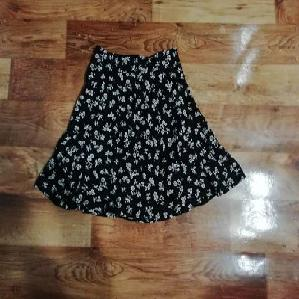

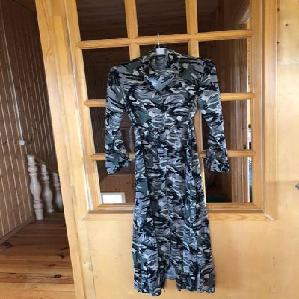

In [48]:
skirt = 'clothing-dataset-small/validation/skirt/2459a9ab-b654-4aef-be7c-89340da78cec.jpg'
skirt = load_img(skirt, target_size=(299,299))

dress = 'clothing-dataset-small/validation/dress/bcb839e0-9055-4760-b5a4-b7fd703b716f.jpg'
dress = load_img(dress, target_size=(299,299))

display_jpeg(skirt)
display_jpeg(dress)

In [49]:
X = np.array([np.array(skirt), np.array(dress)])
X = preprocess_input(X)
preds = model.predict(X)

1/1 [==============================] - 0s 19ms/step


In [50]:
for p in preds:
    print(f"Predicted class: {classes[np.argmax(p)]}")
    print("logits", dict(zip(classes, np.round(p, 3))))

Predicted class: skirt
logits {'dress': 2.48, 'hat': -4.027, 'longsleeve': -6.645, 'outwear': -4.527, 'pants': 0.492, 'shirt': -4.711, 'shoes': -2.099, 'shorts': 4.209, 'skirt': 4.64, 't-shirt': -0.868}
Predicted class: dress
logits {'dress': 7.116, 'hat': -5.585, 'longsleeve': -3.292, 'outwear': -2.379, 'pants': 0.023, 'shirt': -3.337, 'shoes': -1.768, 'shorts': -2.041, 'skirt': -0.473, 't-shirt': 0.181}
